In [135]:
import cv2 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### Harris


In [24]:
imgobj = cv2.imread('img/green_face.jpg',)
gray_img = cv2.cvtColor(imgobj, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)
corners = cv2.goodFeaturesToTrack(gray_img, maxCorners=50,     qualityLevel=0.20, minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]

    cv2.circle(imgobj, (int(x), int(y)), 50, (255, 0, 0), -1)


cv2.imshow('',imgobj)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [89]:
def angle_cos(p0, p1, p2):
    import numpy as np

    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

In [34]:
imgobj = cv2.imread('img/green_face.jpg',)
gray_img = cv2.cvtColor(imgobj, cv2.COLOR_BGR2GRAY)
gray_img = np.float32(gray_img)
blurred = cv2.GaussianBlur(gray_img, (3, 3), 0)
canny = cv2.Canny(gray_img, 40, 80)
cv2.imshow('',canny)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.4-dev) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'Canny'


In [149]:
# import the opencv library
import cv2
vid = cv2.VideoCapture(0) 
is_acquis=False;
while(True):   
    # Capture the video frame
    # by frame
    ret, frame = vid.read()


    font = cv2.FONT_HERSHEY_SIMPLEX
    gray_img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_img = np.float32(gray_img)
    blurred = cv2.GaussianBlur(gray_img, (3, 3), 0)
    canny = cv2.Canny(frame, 20, 40)
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(canny, kernel, iterations=2)
    (contours, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    squares=[]
    for cnt in contours:
                    cnt_len = cv2.arcLength(cnt, True)
                    cnt = cv2.approxPolyDP(cnt, 0.04*cnt_len, True)
                    if len(cnt) == 4  and cv2.isContourConvex(cnt):
                        cnt = cnt.reshape(-1, 2)
                        max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in range(4)])
                        if max_cos < 0.2 and cv2.contourArea(cnt)>5000 and  cv2.contourArea(cnt)<10000:
                            squares.append(cnt)

    cv2.drawContours(frame, squares, -1, (0,255,0), 3)

    if len(squares)==9:
            front_face=frame
            front_face_contours=squares
            #get_colors(frame,squares)
            is_acquis=True
    
    if is_acquis:
        cv2.putText(frame, 'Acquis !,tournez la face', (50, 50), font, 1, (0, 255, 255), 2, cv2.LINE_4)
            

    
    cv2.imshow('frame',frame)
    




    # Display the resulting frame
    
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()

cv2.destroyAllWindows()

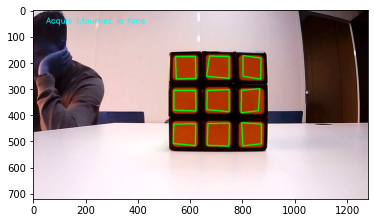

In [150]:
plt.imshow(front_face)

In [182]:
def get_contours(img,contours):
    tab=[]
    for cnt in contours:
        if cv2.contourArea(cnt) >800: # filter small contours
            x,y,w,h = cv2.boundingRect(cnt) # offsets - with this you get 'mask'
            tab.append(np.array(cv2.mean(img[y:y+h,x:x+w])).astype(np.uint8))
    return np.mean(np.array(tab),axis=0).astype(np.uint8)



In [183]:
get_contours(front_face,front_face_contours)

array([144,  88,   0,   0], dtype=uint8)

In [ ]:
blue =[144,  88,   0,   0]